In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from helpers import *
%load_ext autoreload
%autoreload 2
from implementations import *

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

## Do your thing crazy machine learning thing here :) ...

## Cleaning of data and visualisation

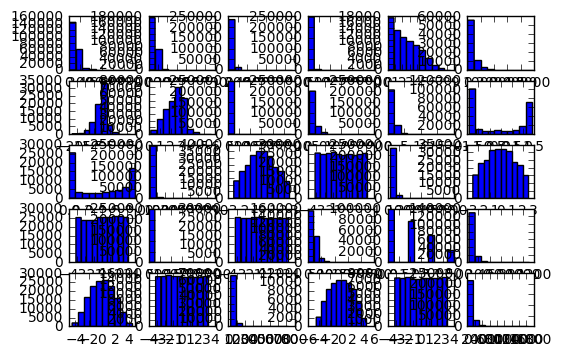

In [3]:
#visualisation
num_plot = np.shape(tX)[1] 
f,a = plt.subplots(5,6)
a = a.ravel()
for i,ax in enumerate(a):
    column = tX[:,i]
    clean = column[np.where(column != -999)]
    ax.hist(clean)

#f.savefig('test.png',dpi=400,bbox_inches = 'tight')

(array([ 99913.,      0.,      0.,  77544.,      0.,      0.,  50379.,
             0.,      0.,  22164.]),
 array([ 0. ,  0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ]),
 <a list of 10 Patch objects>)

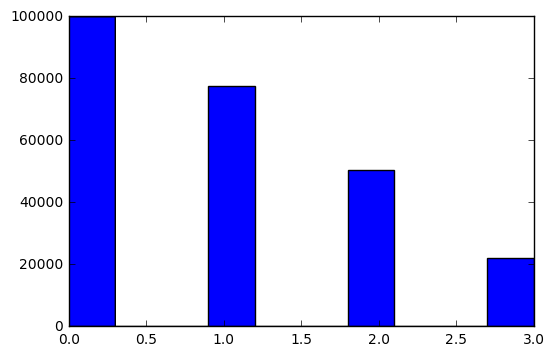

In [23]:
plt.hist(tX[:,22])

In [22]:
#sort data over column 22
tX_sort = []
y_sort = []
for i in range(0,4):
    idx = np.where(tX[:,22]==i)
    idx = idx[0]
    tX_sort.append(tX[idx,:])
    y_sort.append(tX[idx,:])
    


(99913, 30)
(77544, 30)
(50379, 30)
(22164, 30)


In [24]:
#Clean data

#a = np.array([[3.0,8.0,5.0,-999.0,1.0],[7.0,4.0,1.0,3.0,8.0]])

tX_stand = []
for x in tX_sort:
    #remove -999 to the mean of the colum
    for column in x.T:
        clean = column[np.where(column != -999)]
        mean = np.mean(clean)
        column[np.where(column == -999)] = mean

    standard_data = standardize(x)
    tX_stand.append(standard_data[0])


/Users/Mick/Documents/SV/MA3/pattern/project/PCML_Project1/scripts/helpers.py:12: RuntimeWarning: invalid value encountered in greater
  x[:, std_x>0] = x[:, std_x>0] / std_x[std_x>0]


(4,)


In [32]:
tX_clean = []
for x in tX_stand:
    cov = np.dot(x.T, x) / np.shape(x)[0]
    cov_clean = cov - np.eye(cov.shape[0])

    test = np.where(cov_clean > 0.85) 
    #90 plutot que la 10
    #85 10 et 30
    column_to_remove = [10,22,30]
    column_to_keep = [i for i in range(cov.shape[0])]
    column_to_keep = np.delete(column_to_keep,column_to_remove)
    tX_clean.append(x[:,column_to_keep])


(77544, 28)


/Users/Mick/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in greater


In [7]:
degree = 3
a = np.array([2,3])
c = build_poly2(tX_clean,degree)
print(np.shape(c))

(250000, 310)


In [8]:
a = np.array([[1,2,3,4],[4,5,6,7],[7,8,9,10]])
print(a)
test = np.where(a>8)
print(test)

[[ 1  2  3  4]
 [ 4  5  6  7]
 [ 7  8  9 10]]
(array([2, 2]), array([2, 3]))


In [6]:
#split data
ratio = 0.8
#60% train, 20%test, 20%cross

#test_x = np.array([1,2,3,4,5,6,7,8,9,10])
#test_y = np.array([1,1,1,1,1,-1,1,-1,-1,-1])
#x_train, x_test, y_train,y_test  = split_data(test_y,test_x,ratio)

x_train, x_test, y_train,y_test = split_data(y,tX_clean,ratio)


/Users/Mick/anaconda/lib/python3.5/site-packages/numpy/lib/shape_base.py:422: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  sub_arys.append(_nx.swapaxes(sary[st:end], axis, 0))


## Test of the different methods

In [10]:
#*********************** least squares *******************#
#mse,weight = least_squares(y,tX)
mse_train,weight = least_squares(y_train,x_train)
mse_test = compute_loss(y_test,x_test,weight)
print("mse train",mse_train)
print("mse test",mse_test)

mse train 0.340174218971
mse test 0.341431072228


In [11]:
y_pred = predict_labels(weight, x_test)
y_t = y_test * y_pred
y_correct = np.where(y_t==1)
print(np.shape(y_correct))
print(np.shape(y_test))
print('Correct pourcentage predition =',np.shape(y_correct)[1]/np.shape(y_test)[0])


(1, 37086)
(50000,)
Correct pourcentage predition = 0.74172


In [12]:
#******************** gradient descent *******************#
w_initial = np.zeros([x_train.shape[1]])
max_iters = 500
gamma = 0.08
mse,weight = least_squares_GD(y_train,x_train,w_initial,max_iters,gamma)
print(mse)
print(weight)

0.340182875803
[ -3.15946381e-01   3.52562767e-03  -2.56653186e-01  -2.53152816e-01
  -4.30071925e-03   2.33875787e-02   8.92167044e-02   4.96303685e-03
   2.78572780e-01  -2.48158452e-02   6.17359261e-02  -1.81959668e-01
   1.18721881e-01   7.77613991e-02   1.74154971e-01  -1.83300714e-03
  -1.18163271e-03   2.70578327e-01   5.00200249e-04   2.62774342e-03
   1.07174203e-01   1.59985685e-03  -4.84441736e-02   2.96519968e-02
  -5.35634882e-02   7.54133085e-05   8.06113375e-04  -3.99843638e-02
   1.73056642e-03  -8.07480923e-04  -2.78545724e-02]


In [14]:
#************** stochastic gradient descent ****************#
w_initial = np.zeros([x_train.shape[1]])
max_iters = 1000
gamma = 0.01
mse_SGD,weight_SGD = least_squares_SGD(y_train,x_train,w_initial,max_iters,gamma)
print(mse_SGD)
print(weight)

0.231496730174
[ -3.15946381e-01   3.52562767e-03  -2.56653186e-01  -2.53152816e-01
  -4.30071925e-03   2.33875787e-02   8.92167044e-02   4.96303685e-03
   2.78572780e-01  -2.48158452e-02   6.17359261e-02  -1.81959668e-01
   1.18721881e-01   7.77613991e-02   1.74154971e-01  -1.83300714e-03
  -1.18163271e-03   2.70578327e-01   5.00200249e-04   2.62774342e-03
   1.07174203e-01   1.59985685e-03  -4.84441736e-02   2.96519968e-02
  -5.35634882e-02   7.54133085e-05   8.06113375e-04  -3.99843638e-02
   1.73056642e-03  -8.07480923e-04  -2.78545724e-02]


# ridge regression

degree:  1
1 --> 0.340551670736  AND  0.340698424586
degree:  2
2 --> 0.315361360125  AND  0.315921553514
degree:  3
3 --> 0.305199160197  AND  0.307510860086
degree:  4
4 --> 0.299648789789  AND  0.325477078144
degree:  5
5 --> 0.296858172354  AND  0.533863212141


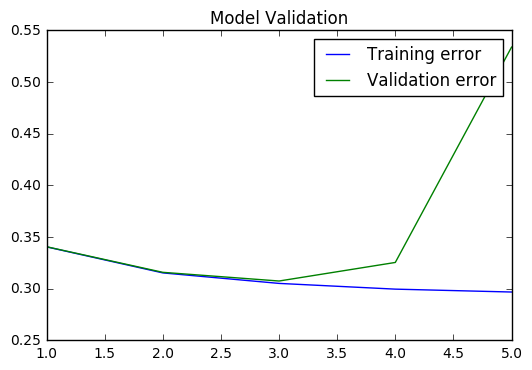

In [15]:
#model validation

degrees = range(1,6)
k_fold = 4
lambda_ = 0.01
mean_train_mse = []
mean_cv_mse = []

k_indices = build_k_indices(y_train, k_fold,seed = 1)
for degree in degrees:
    print("degree: ",degree)
    
    train_mse = []
    cv_mse = []
    #k fold
    for k in range(k_fold):
        x_cv = x_train[k_indices[k]]
        y_cv = y_train[k_indices[k]]
        #remove
        rem_indice = k_indices[~(np.arange(k_indices.shape[0])==k)]
        #set them in a vector
        rem_indice = rem_indice.reshape(-1)
        x_train_fold = x_train[rem_indice]
        y_train_fold = y_train[rem_indice]

        #get the ones in the matrix
        x_train_poly = build_poly(x_train_fold,degree)
        x_cv_poly = build_poly(x_cv,degree)
        
        mse_train,w = ridge_regression(y_train_fold, x_train_poly, lambda_)
        mse_cv = compute_loss(y_cv,x_cv_poly,w)
        
        train_mse.append(mse_train)
        cv_mse.append(mse_cv)
        
    mean_train_mse.append(np.mean(train_mse))
    mean_cv_mse.append(np.mean(cv_mse))
    
    print(degree,'-->',np.mean(train_mse),' AND ', np.mean(cv_mse))
    
p = plt.plot(degrees,mean_train_mse,degrees,mean_cv_mse)
plt.title("Model Validation") 
plt.legend(p, ["Training error","Validation error"])
plt.show()


lambda:  0.001
0.001 --> 0.298666569635  AND  0.314673408905
lambda:  0.0016681005372
0.0016681005372 --> 0.29871595108  AND  0.315742550877
lambda:  0.00278255940221
0.00278255940221 --> 0.298819679171  AND  0.317432821439
lambda:  0.00464158883361
0.00464158883361 --> 0.299023846912  AND  0.319966646965
lambda:  0.00774263682681
0.00774263682681 --> 0.29938856652  AND  0.323442581133
lambda:  0.0129154966501
0.0129154966501 --> 0.299967204637  AND  0.327620895211
lambda:  0.0215443469003
0.0215443469003 --> 0.300788330256  AND  0.331817450414
lambda:  0.035938136638
0.035938136638 --> 0.30188678219  AND  0.335141106294
lambda:  0.0599484250319
0.0599484250319 --> 0.303397456244  AND  0.336987134482
lambda:  0.1
0.1 --> 0.305651090251  AND  0.337391725923


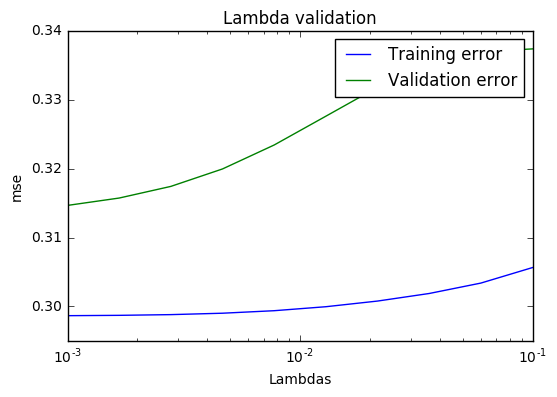

In [16]:
#lambda validation

lambdas = np.logspace(-3, -1, 10)
k_fold = 4
degree = 4
mean_train_mse = []
mean_cv_mse = []

k_indices = build_k_indices(y_train, k_fold,seed = 1)
for lamb in lambdas:
    print("lambda: ",lamb)
    train_mse = []
    cv_mse = []
    #k fold
    for k in range(k_fold):
        x_cv = x_train[k_indices[k]]
        y_cv = y_train[k_indices[k]]
        #remove
        rem_indice = k_indices[~(np.arange(k_indices.shape[0])==k)]
        #set them in a vector
        rem_indice = rem_indice.reshape(-1)
        x_train_fold = x_train[rem_indice]
        y_train_fold = y_train[rem_indice]
    
        #get the ones in the matrix
        x_train_poly = build_poly(x_train_fold,degree)
        x_cv_poly = build_poly(x_cv,degree)
        
        mse_train,w = ridge_regression(y_train_fold, x_train_poly, lamb)
        mse_cv = compute_loss(y_cv,x_cv_poly,w)
        
        train_mse.append(mse_train)
        cv_mse.append(mse_cv)
        
    mean_train_mse.append(np.mean(train_mse))
    mean_cv_mse.append(np.mean(cv_mse))
    
    print(lamb,'-->',np.mean(train_mse),' AND ', np.mean(cv_mse))
        
    
p=plt.semilogx(lambdas,mean_train_mse,lambdas,mean_cv_mse)
plt.title("Lambda validation") 
plt.legend(p, ["Training error","Validation error"])
plt.xlabel('Lambdas')
plt.ylabel('mse')
plt.show()


In [18]:
#************** logistic regression ****************#
max_iters = 1
gamma = 0.000001
lambda_ = 0.016
w_initial = np.random.uniform(low = -0.05,high = 0.05, size = x_test.shape[1])
mse,weight = reg_logistic_regression(y_test, x_test, lambda_, w_initial, max_iters, gamma)
print(mse)
print(weight)

0.512234840777
[ 0.01986925  0.03999126 -0.03448452  0.00290818  0.02804805 -0.04354201
 -0.03261038 -0.00066052  0.03857483 -0.01496243  0.03456279  0.02720525
  0.01813649 -0.02395297 -0.00319231  0.02224502  0.02118949 -0.04017565
  0.01092822 -0.0105963  -0.03873884 -0.04108401  0.03063882  0.03605186
  0.00240256  0.04892051  0.01222166  0.01909464 -0.04979133  0.03722616
 -0.04487578]


In [7]:
#best parameters

#With all columns + ones mse 0.302798792593
degree = 4
lambda_ = 0.00464158883361
#predict 39569

#with build poly 2 best lambda mse 0.30188506517
#degree = 4
#lambda_ = 0.001
#predict: 39510 

#with columns without 1 to 13 + ones
#degree = 2
#lambda_ = 0.003
x_train_poly = build_poly(x_train,degree)
x_test_poly = build_poly(x_test,degree)

mse_train,weight = ridge_regression(y_train,x_train_poly, lambda_)
mse_test = compute_loss(y_test,x_test_poly,weight)
print("mse train",mse_train)
print("mse test",mse_test)

y_pred = predict_labels(weight, x_test_poly)
y_t = y_test * y_pred
y_correct = np.where(y_t==1)
print("correct ",np.shape(y_correct)[1])
print('Correct pourcentage predition =',np.shape(y_correct)[1]/np.shape(y_test)[0])



mse train 0.300006493538
mse test 2878.67615743
correct  39681
Correct pourcentage predition = 0.79362


## Test of methods

In [ ]:
#calculate pourcentage of prediction
best_degree = 3
lambda_ = 0.0464158883361

x_train_poly = build_poly(tX_clean,best_degree)

mse_train,weights = ridge_regression(y,x_train_poly, lambda_)
print(np.shape(weights))
print(mse_train)

## Generate predictions and save ouput in csv format for submission:

In [ ]:
DATA_TEST_PATH = '../data/test.csv' # download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [ ]:
for column in tX_test.T:
    clean = column[np.where(column != -999)]
    mean = np.mean(clean)
    column[np.where(column == -999)] = mean
    
standard_test_data = standardize(tX_test)
tX_test_clean = standard_test_data[0]
print(np.shape(tX_test_clean))
tX_test_clean_poly = build_poly2(tX_test_clean,best_degree)
print(np.shape(tX_test_clean_poly))

In [ ]:
OUTPUT_PATH = '../submission5.csv' #  fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test_clean_poly)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)